In [0]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
classes = ('plane','car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)

In [0]:
images, labels = next(iter(trainloader))

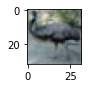

In [0]:
img = images[0].numpy()
img = np.transpose(img, (1, 2, 0))

plt.figure(figsize=(1, 1))
plt.imshow(img)

In [0]:
def imshow(img):
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1, 2, 0))
  plt.imshow(npimg)

bird truck bird plane


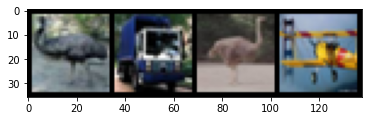

In [0]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[i]] for i in range(4)))

In [0]:
labels

tensor([2, 9, 2, 0])

In [0]:
class LeNet(nn.Module):
  def __init__(self):
      super(LeNet, self).__init__()
      self.cnn_model = nn.Sequential(
          nn.Conv2d(3, 6, 5),
          nn.Tanh(),
          nn.AvgPool2d(2, stride=2),
          nn.Conv2d(6, 16, 5),
          nn.Tanh(),
          nn.AvgPool2d(2, stride=2)
      )

      self.fcn_model = nn.Sequential(
          nn.Linear(400, 120),
          nn.Tanh(),
          nn.Linear(120, 84),
          nn.Tanh(),
          nn.Linear(84, 10)
      )

  def forward(self, x):
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0), -1)
    print(x.shape)
    out = self.fcn_model(x)

    return out



In [0]:
labels.size(0)

128

In [0]:
bs =128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=bs, shuffle=False)


In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    images, labels = data
    outputs = net(images)
    _, pred = torch.max(outputs.data, 1)  #max along first dimension
    #calculating accuracy
    total += labels.size(0)
    correct += (pred == labels).sum().item()

    return (correct/total * 100)

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [0]:
epochs = 10
loss_arr = []
loss_epoch_arr = []

for epoch in range(epochs):
  for i, data in enumerate(trainloader, 0):
    images, labels = data

    opt.zero_grad()

    outputs = net(images) 

    loss = loss_fn(outputs, labels) 
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())

  print('Epoch %d/%d \t Test acc: %0.2f \t Train acc: %0.2f' % (epoch+1, epochs, evaluation(testloader), evaluation(trainloader)))

torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 16, 5, 5])
tor

KeyboardInterrupt: ignored